## PEI Consolidated Revenue Analysis

Using the data from [OD0032 PEI Consolidated Revenues](https://data.princeedwardisland.ca/Government-and-Economy/OD0032-PEI-Consolidated-Revenues/9yq6-iu36) for the years 2011-2019 we aim to mimic the visualizations featured on the open data hub.

In [1]:
%matplotlib inline
# Dependencies.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Style.
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
# Data
df = pd.read_csv('resources/OD0032_PEI_Consolidated_Revenues.csv')
df.head(10)

,Source of Revenue,Type of Revenue,Financial Year,Value
0,Government of Canada,Government of Canada Equalization,2011/12,329022000
1,Government of Canada,Canada Health and Social Transfer,2011/12,165378000
2,Government of Canada,Government of Canada - Other,2011/12,136303000
3,Provincial,Sales Tax,2011/12,214142000
4,Provincial,Real Property Tax,2011/12,97760000
5,Provincial,Personal Income Tax,2011/12,285750000
6,Provincial,Corporate Income Tax,2011/12,42079000
7,Provincial,Other Taxes,2011/12,116683000
8,Provincial,Licenses and Permits,2011/12,24991000
9,Provincial,Fees and Services,2011/12,55601000


In [3]:
# Get unique list of years.
years = df['Financial Year'].unique().tolist()
years

['2011/12',
 '2012/13',
 '2013/14',
 '2014/15',
 '2015/16',
 '2016/17',
 '2017/18',
 '2018/19']

In [4]:
# Create a multi-index DataFrame from the dataset.
multi_df = df.set_index(['Financial Year', 'Source of Revenue', 'Type of Revenue'])
multi_df

Value
Financial Year Source of Revenue    Type of Revenue                             
2011/12        Government of Canada Government of Canada Equalization  329022000
                                    Canada Health and Social Transfer  165378000
                                    Government of Canada - Other       136303000
               Provincial           Sales Tax                          214142000
                                    Real Property Tax                   97760000
...                                                                          ...
2018/19        Provincial           Sales                               32926000
                                    Other income                        41624000
                                    Government Business Enterprises     64740000
                                    Investment Income                   11988000
               Sinking              Sinking Fund Revenue                10515000

[120 rows x 1 columns]

In [5]:
# Group by the Financial Year and then Source of Revenue, sum the result for a stacked bar chart.
revsource_df = df.groupby(['Financial Year', 'Source of Revenue'], axis=0).sum()
revsource_df

Value
Financial Year Source of Revenue               
2011/12        Government of Canada   630703000
               Provincial             944183000
               Sinking                 12233000
2012/13        Government of Canada   595373000
               Provincial             990415000
               Sinking                 11235000
2013/14        Government of Canada   651856000
               Provincial            1031868000
               Sinking                  8114000
2014/15        Government of Canada   668789000
               Provincial            1049067000
               Sinking                  9057000
2015/16        Government of Canada   644905000
               Provincial            1104806000
               Sinking                  8996000
2016/17        Government of Canada   695950000
               Provincial            1132411000
               Sinking                  9060000
2017/18        Government of Canada   718564000
               Provincial            1259392000
               Sinking                  9710000
2018/19        Government of Canada   773257000
               Provincial            1294919000
               Sinking                 10515000

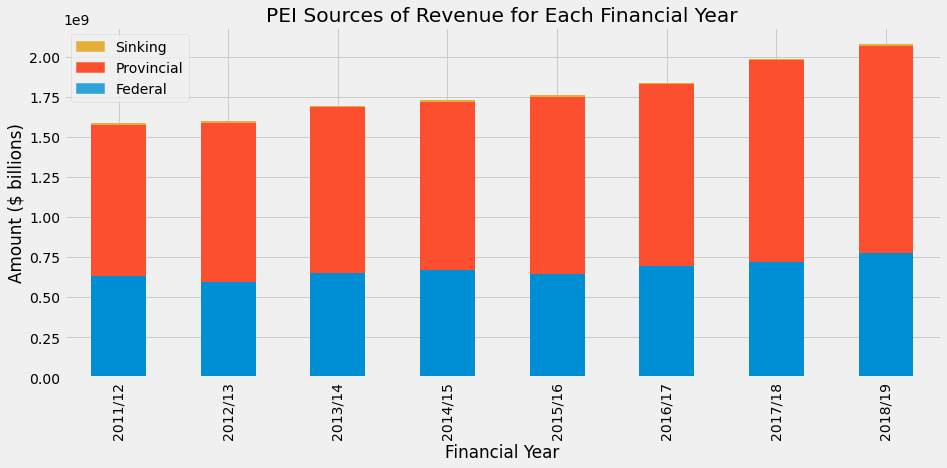

In [6]:
# Create the stacked bar chart plot.
revsource_df.unstack().plot.bar(stacked=True,
                                figsize=(14,6),
                                title='PEI Sources of Revenue for Each Financial Year',
                                ylabel='Amount ($ billions)')

# Legend.
fed = mpatches.Patch(color='#30a2da', label='Federal')
prov = mpatches.Patch(color='#fc4f30', label='Provincial')
sink = mpatches.Patch(color='#e5ae38', label='Sinking')
plt.legend(handles=[sink, prov, fed])

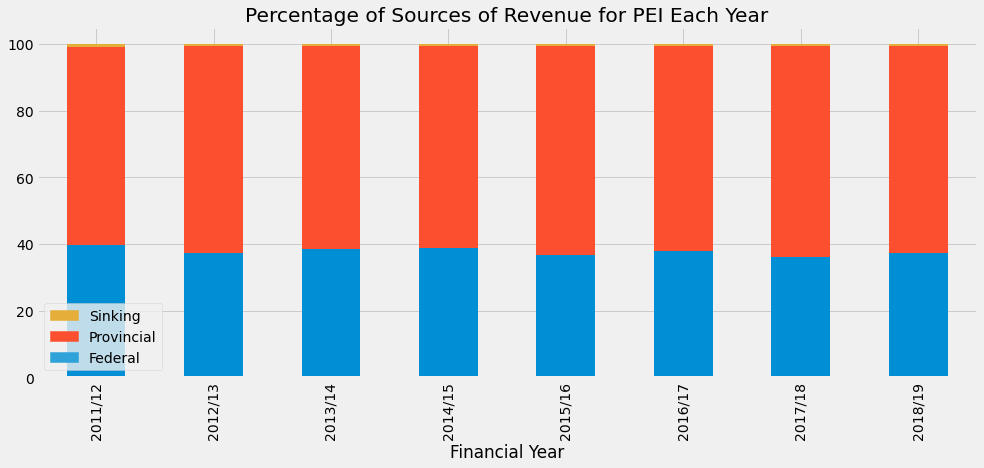

In [7]:
# Create a stacked bar chart plot to 100%.
oneh_df = revsource_df.unstack().apply(lambda x: x*100/sum(x), axis=1)
oneh_df.plot.bar(stacked=True, figsize=(15, 6), title='Percentage of Sources of Revenue for PEI Each Year')

# Legend.
fed = mpatches.Patch(color='#30a2da', label='Federal')
prov = mpatches.Patch(color='#fc4f30', label='Provincial')
sink = mpatches.Patch(color='#e5ae38', label='Sinking')
plt.legend(handles=[sink, prov, fed])